# Exercise 2 - CNN

## Objective

In this exercise, you will use the Keras API to create a first CNN.


## Details

Using the Keras API, you have to create a small convolutional neural networks using less than 15 layers, containing
at least one convolutional layer, one pooling layer and one dense (fully connected layer). You can find a list of the different
layers available [here](https://www.tensorflow.org/api_docs/python/tf/keras/layers).

You should experiment with different designs (number of layers, types of pooling, filter sizes, number of fully connected layers, number of neurons).

You will need to feed the image directory to `training.py` (`GTSRB/Final_Training/Images/`) with `-d`, and can view the final metrics visualization in the Desktop.

## Tips

A good starting point for small networks is LeNet5. You will find many existing implementations online.

Don't forget the basic structure of a convnet: convolutional layer, activation and pooling.

You can use the [`summary`](https://www.tensorflow.org/api_docs/python/tf/keras/Model#summary) method of the Keras model API to print the description of your model.

2021-10-22 03:03:34,811 INFO     Training for 100 epochs using GTSRB/Final_Training/Images data
2021-10-22 03:03:34,811 INFO     Training for 100 epochs using GTSRB/Final_Training/Images data
2021-10-22 03:03:34,811 INFO     Training for 100 epochs using GTSRB/Final_Training/Images data


Found 4300 files belonging to 43 classes.
Using 3440 files for training.


2021-10-22 03:03:35,399 INFO     Summary_1: None
2021-10-22 03:03:35,399 INFO     Summary_1: None
2021-10-22 03:03:35,399 INFO     Summary_1: None


Found 4300 files belonging to 43 classes.
Using 860 files for validation.
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 32, 32, 16)        448       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 11, 11, 16)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 4, 4, 32)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 512)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 1024)              525312    
______________________________________________

Epoch 47/100
108/108 [==============================] - 2s 22ms/step - loss: 1.7371e-04 - accuracy: 1.0000 - val_loss: 0.8407 - val_accuracy: 0.8791
Epoch 48/100
108/108 [==============================] - 2s 22ms/step - loss: 1.6171e-04 - accuracy: 1.0000 - val_loss: 0.8449 - val_accuracy: 0.8802
Epoch 49/100
108/108 [==============================] - 2s 22ms/step - loss: 1.5022e-04 - accuracy: 1.0000 - val_loss: 0.8545 - val_accuracy: 0.8791
Epoch 50/100
108/108 [==============================] - 3s 23ms/step - loss: 1.3957e-04 - accuracy: 1.0000 - val_loss: 0.8617 - val_accuracy: 0.8791
Epoch 51/100
108/108 [==============================] - 2s 21ms/step - loss: 1.2835e-04 - accuracy: 1.0000 - val_loss: 0.8693 - val_accuracy: 0.8802
Epoch 52/100
108/108 [==============================] - 3s 29ms/step - loss: 1.2478e-04 - accuracy: 1.0000 - val_loss: 0.8772 - val_accuracy: 0.8826
Epoch 53/100
108/108 [==============================] - 2s 22ms/step - loss: 1.1414e-04 - accuracy: 1.0000

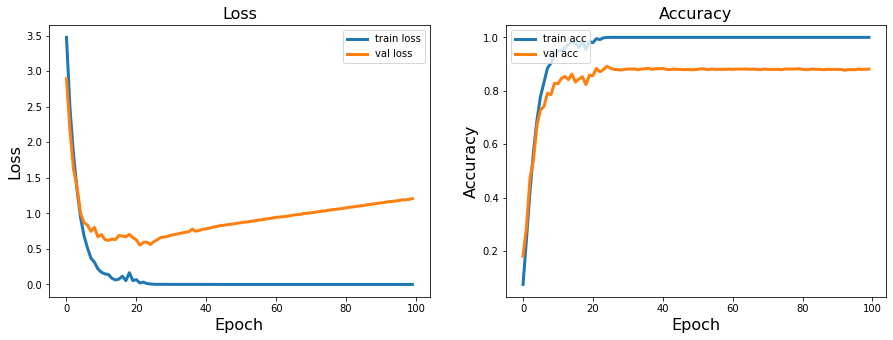

In [3]:
import argparse
import logging

import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

from utils import get_datasets, get_module_logger, display_metrics


def create_network():
    # IMPLEMENT THIS FUNCTION    
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(
            16, (3, 3), strides=(1, 1), padding='same', activation='relu', use_bias=True, 
            input_shape=(32, 32, 3)
        ),
        tf.keras.layers.MaxPool2D(pool_size=(3, 3), strides=(3, 3), padding='same'),
        
        tf.keras.layers.Conv2D(
            32, (3, 3), strides=(1, 1), padding='same', activation='relu', use_bias=True
        ),
        tf.keras.layers.MaxPool2D(pool_size=(3, 3), strides=(3, 3), padding='same'),        

        tf.keras.layers.Flatten(),
        
        tf.keras.layers.Dense(1024, activation='relu'),
        tf.keras.layers.Dense(1024, activation='relu'),
        tf.keras.layers.Dense(43, activation=None)       
    ])
    
    return model

if __name__  == '__main__':
    logger = get_module_logger(__name__)
#     parser = argparse.ArgumentParser(description='Download and process tf files')
#     parser.add_argument('-d', '--imdir', required=True, type=str,
#                         help='data directory')
#     parser.add_argument('-e', '--epochs', default=10, type=int,
#                         help='Number of epochs')
#     args = parser.parse_args()    

    
    epochs = 100
    imdir = 'GTSRB/Final_Training/Images'            

    logger.info(f'Training for {epochs} epochs using {imdir} data')
    
    # get the datasets
    train_dataset, val_dataset = get_datasets(imdir)

    model = create_network()
    logger.info(f'Summary: {model.summary()}')
    
    model.compile(
        optimizer='adam',
        loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),  # logits=True means it is raw output, as an input to softmax
        metrics=['accuracy']
    )
    
    history = model.fit(
        x=train_dataset,
        epochs=epochs,
        validation_data=val_dataset
    )
    
    display_metrics(history)    